<a href="https://colab.research.google.com/github/MaTheusSlv/PosGraduacaoMackenzie_CienciaDeDados/blob/main/PL_Python_3_exercicio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right">

<h1 align=left><font size = 8, style="color:rgb(200,0,0)"><b>Ciência de Dados </b></font></h1>
<h1 align=left><font size = 5, style="color:rgb(0,0,0)"><b>Paradigmas de Linguagens de
Programação para Ciência de Dados</b></font></h1>

# 3 Visualização dos Dados com Matplotlib e Seaborn
Professores: *Diego Nogare* & *Rogério de Oliveira*

<br>
<br>

---


# Exercícios

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Examine graficamente as funções,

$$ y(t) = e^{-t} $$
$$ y(t) = e^{-t} cos(2 \pi t) $$
$$ y(t) = e^{-|t|} sin(t) $$

Qual delas apresenta evolução monotonicamente (sempre em um único sentido) decrescente?




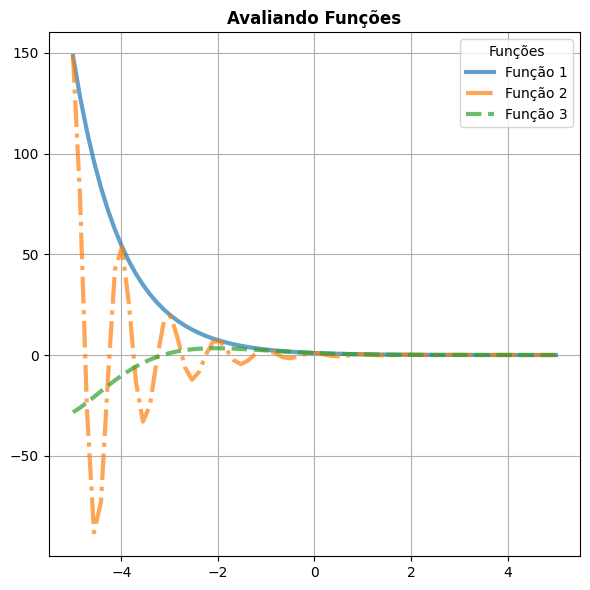

A função que apresenta uma evolução monotonicamente(de sentido único) decrescente é a Função 1


In [ ]:
t = np.linspace(-5, 5, 70) #cria-se um espaço vetorial

#1° função
def func1(t):
  return pow(np.e, -t)

#1° função
def func2(t):
  return pow(np.e, -t)*np.cos(2*np.pi*t)

#1° função
def func3(t):
  return (pow(np.e, -t)*np.sin(t)) / t

plt.figure(figsize=(6,6)) #cria-se a figura
plt.title('Avaliando Funções', weight='bold') #adiciona o titulo da figura
plt.plot(t, func1(t), label='Função 1', linewidth=3, alpha=0.7) #linha 1
plt.plot(t, func2(t), label='Função 2', linewidth=3, alpha=0.7, linestyle='dashdot') #linha 2
plt.plot(t, func3(t), label='Função 3', linewidth=3, alpha=0.7, linestyle='dashed') #linha 3
plt.legend(title='Funções') #adiciona a legenda
plt.grid() #adiciona o grid no fundo

plt.tight_layout() #ajusta automaticamente os parâmetros dos subplots dentro da figura
plt.show() #explicita a exibição da figura

print('A função que apresenta uma evolução monotonicamente(de sentido único) decrescente é a Função 1')


# Examine a distribuição de idades dos passageiros de `Titanic`,

graficamente você identifica que tipo de distribuição de idades?

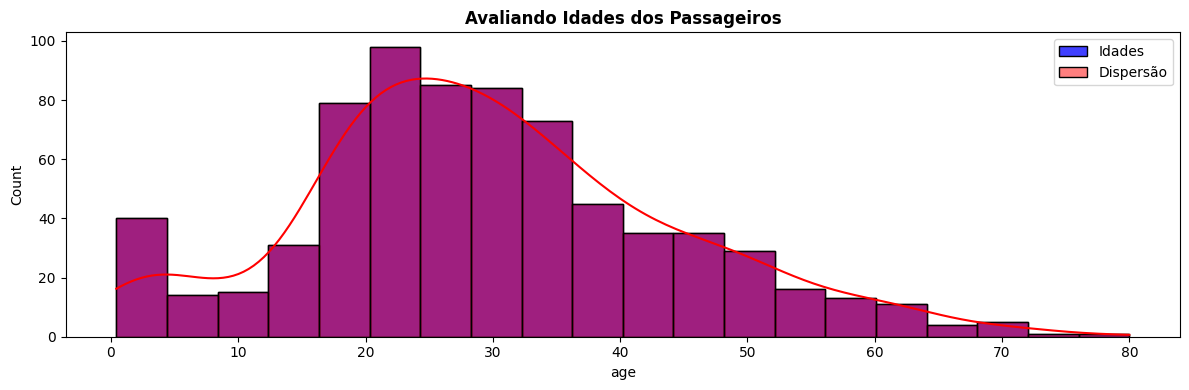

Pode-se observar que a distribuição é uma distribuição bimodal


In [ ]:
titanic = sns.load_dataset('titanic')

plt.figure(figsize=(12,4)) #cria-se a figura
sns.histplot(titanic.age, label='Idades', color='blue') #barras do histograma
sns.histplot(titanic.age, kde=True, label='Dispersão', color='red') #linha de dispersão
plt.title('Avaliando Idades dos Passageiros', weight='bold') #adiciona o titulo da figura
plt.legend() #adiciona a legenda

plt.tight_layout() #ajusta automaticamente os parâmetros dos subplots dentro da figura
plt.show() #explicita a exibição da figura

print('Pode-se observar que a distribuição é uma distribuição bimodal')


# Despolarização neural,

Empregue o dataset `dots`. Veja o gráfico abaixo para entender o que é a fase de **despolarização**. Produza então um gráfico para examinar quanto dura aproximadamente a despolarização de um neurônio do tipo = choice 'T2' e align 'dots'.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/4a/Action_potential.svg/300px-Action_potential.svg.png" width=300, align="center">

In [ ]:
import seaborn as sns
df = sns.load_dataset('dots')
df.head()


,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487


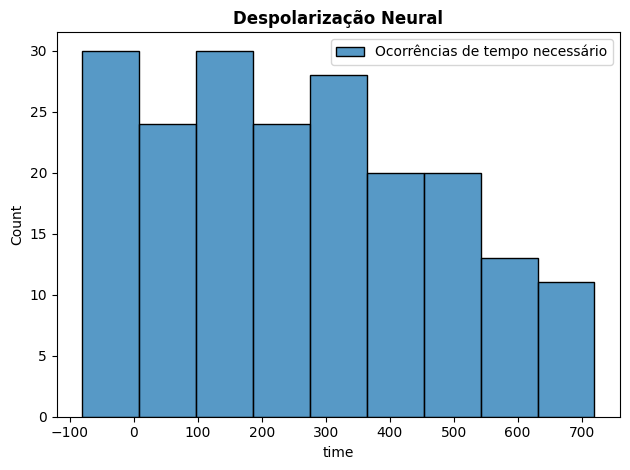

In [ ]:
df.astype({'align':'str', 'choice':'str'}) #converte os campos align e choice de object para string
df = pd.DataFrame(df[(df['align'] == 'dots') & (df['choice'] == 'T2')]) #filtra os dados do dataframe

sns.histplot(df.time, label='Ocorrências de tempo necessário') #barras do histograma
plt.title('Despolarização Neural', weight='bold') #adiciona o titulo da figura
plt.legend() #adiciona a legenda

plt.tight_layout() #ajusta automaticamente os parâmetros dos subplots dentro da figura
plt.show() #explicita a exibição da figura

# Tendência de Valores da Bolsa,

Analisando graficamente os índices da Bolsa da base abaixo, qual ou quais índices apresentam tendência (movimentos de alta e baixa) discrepantes com relação ao IBOV no período?

In [ ]:
import pandas as pd
df = pd.read_csv('http://meusite.mackenzie.br/rogerio/data_load/bovespa2020_2021.csv')
df.head()

,data,IBOV,VALE3,PETR4,DOLAR
0,2020-01-02,118573.0,13.45,16.270000,4.0163
1,2020-01-03,117707.0,13.29,15.990000,4.0234
2,2020-01-06,116878.0,13.14,16.219999,4.0570
3,2020-01-07,116662.0,13.23,16.059999,4.0604
4,2020-01-08,116247.0,13.22,15.700000,4.0662


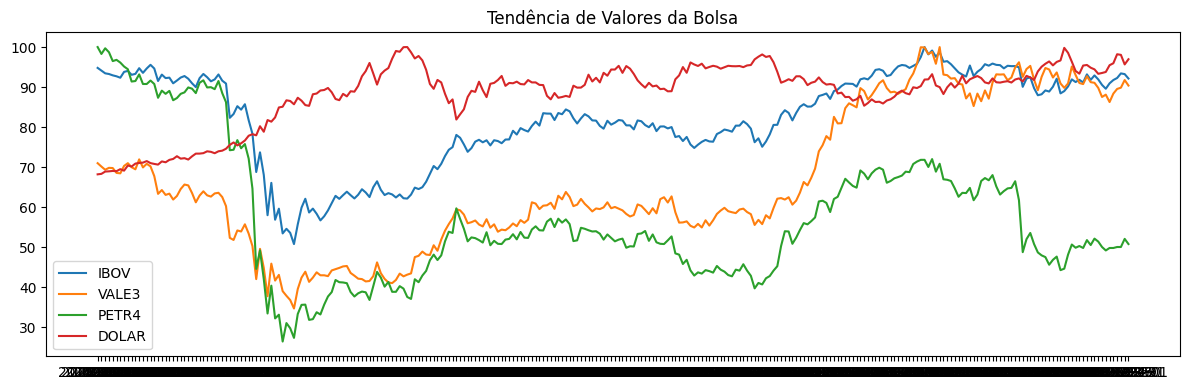

O índice que têm tendência discrepante do IBOV é o DOLAR


In [ ]:
df.IBOV = df.IBOV / max(df.IBOV)
df.VALE3 = df.VALE3 / max(df.VALE3)
df.PETR4 = df.PETR4 / max(df.PETR4)
df.DOLAR = df.DOLAR / max(df.DOLAR) #normalizando os índices

x = df['data'] #define a data como eixo X
plt.figure(figsize=(12,4)) #cria-se a figura
plt.title('Tendência de Valores da Bolsa') #adiciona o titulo da figura
plt.plot(x, df['IBOV']*100, label='IBOV') #linha 1
plt.plot(x, df['VALE3']*100, label='VALE3') #linha 2
plt.plot(x, df['PETR4']*100, label='PETR4') #linha 3
plt.plot(x, df['DOLAR']*100, label='DOLAR') #linha 4

plt.legend() #adiciona a legenda

plt.tight_layout() #ajusta automaticamente os parâmetros dos subplots dentro da figura
plt.show() #explicita a exibição da figura

print('O índice que têm tendência discrepante do IBOV é o DOLAR')

# Buscando Correlações,

Considere os valores numéricos de `mpg` (abaixo). Construa um gráfico que permita você observar a correlação dos dados com relação a valor de `mpg` (milhas por galão) e responder que atributos apresentam correlação negativa e valores aproximadamente inferiores a  $-0.7$.

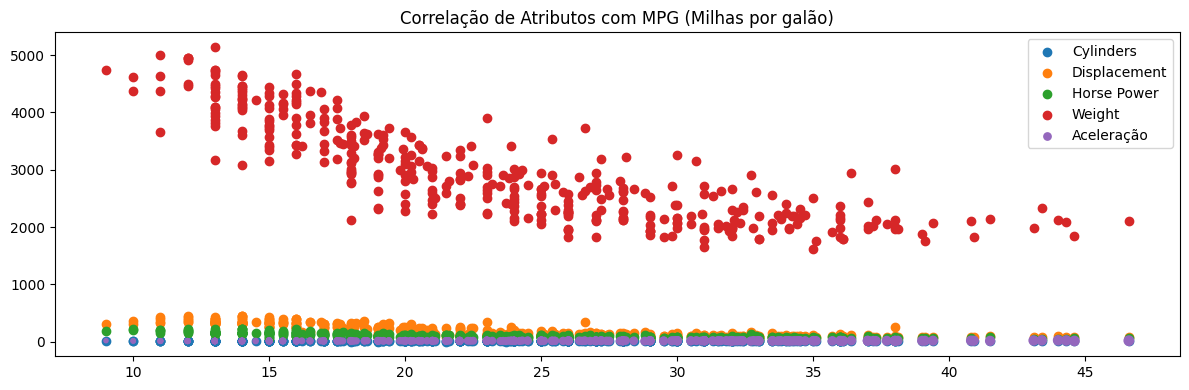

In [ ]:
import seaborn as sns
df = sns.load_dataset('mpg')
df.head()

x = df['mpg'] #define o mpg como eixo X
plt.figure(figsize=(12,4)) #cria-se a figura
plt.title('Correlação de Atributos com MPG (Milhas por galão)') #adiciona o titulo da figura
plt.scatter(x, df['cylinders'], label= 'Cylinders') #variável 1
plt.scatter(x, df['displacement'], label= 'Displacement') #variável 2
plt.scatter(x, df['horsepower'], label= 'Horse Power') #variável 3
plt.scatter(x, df['weight'], label= 'Weight') #variável 4
plt.scatter(x, df['acceleration'], x, label= 'Aceleração') #variável 5

plt.legend() #adiciona a legenda

plt.tight_layout() #ajusta automaticamente os parâmetros dos subplots dentro da figura
plt.show() #explicita a exibição da figura